<a href="https://colab.research.google.com/github/Nathan1scott/Data_selection/blob/main/Breastcancerdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Develop and test machine learning models for early and accurate breast cancer detection using the breast cancer dataset.

## Load the data


Load the breast cancer dataset into a pandas DataFrame.

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the dataset
cancer = load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# Display the first few rows
display(df.head())

# Display information about the DataFrame
display(df.info())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

None

## Preprocess the data


Handle missing values, encode categorical features, and scale numerical features as needed.

In [2]:
# Check for missing values
print(df.isnull().sum())

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


## Split the data


Split the data into training, validation, and test sets.

**Reasoning**:
Split the scaled data into training, validation, and test sets and verify their shapes.



In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (398, 30)
Shape of y_train: (398,)
Shape of X_val: (85, 30)
Shape of y_val: (85,)
Shape of X_test: (86, 30)
Shape of y_test: (86,)


## Select and train models


Choose the appropriate machine learning models (logistic regression, SVM, neural networks) and train them on the training data.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Instantiate each model with default parameters
lr_model = LogisticRegression()
svm_model = SVC()
nn_model = MLPClassifier(max_iter=1000) # Increase max_iter for convergence

# Train each model
lr_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


## Evaluate models


Evaluate the trained models on the validation set using appropriate metrics (e.g., accuracy, precision, recall, F1-score, AUC).

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate Logistic Regression
lr_pred = lr_model.predict(X_val)
lr_accuracy = accuracy_score(y_val, lr_pred)
lr_precision = precision_score(y_val, lr_pred)
lr_recall = recall_score(y_val, lr_pred)
lr_f1 = f1_score(y_val, lr_pred)
lr_auc = roc_auc_score(y_val, lr_model.predict_proba(X_val)[:, 1])

print("Logistic Regression Metrics:")
print(f"  Accuracy: {lr_accuracy:.4f}")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall: {lr_recall:.4f}")
print(f"  F1-score: {lr_f1:.4f}")
print(f"  AUC: {lr_auc:.4f}")
print("-" * 20)

# Evaluate SVM
# Set probability=True when instantiating SVC if you need AUC
svm_model_prob = SVC(probability=True)
svm_model_prob.fit(X_train, y_train)

svm_pred = svm_model_prob.predict(X_val)
svm_accuracy = accuracy_score(y_val, svm_pred)
svm_precision = precision_score(y_val, svm_pred)
svm_recall = recall_score(y_val, svm_pred)
svm_f1 = f1_score(y_val, svm_pred)
svm_auc = roc_auc_score(y_val, svm_model_prob.predict_proba(X_val)[:, 1])


print("SVM Metrics:")
print(f"  Accuracy: {svm_accuracy:.4f}")
print(f"  Precision: {svm_precision:.4f}")
print(f"  Recall: {svm_recall:.4f}")
print(f"  F1-score: {svm_f1:.4f}")
print(f"  AUC: {svm_auc:.4f}")
print("-" * 20)

# Evaluate Neural Network
nn_pred = nn_model.predict(X_val)
nn_accuracy = accuracy_score(y_val, nn_pred)
nn_precision = precision_score(y_val, nn_pred)
nn_recall = recall_score(y_val, nn_pred)
nn_f1 = f1_score(y_val, nn_pred)
nn_auc = roc_auc_score(y_val, nn_model.predict_proba(X_val)[:, 1])


print("Neural Network Metrics:")
print(f"  Accuracy: {nn_accuracy:.4f}")
print(f"  Precision: {nn_precision:.4f}")
print(f"  Recall: {nn_recall:.4f}")
print(f"  F1-score: {nn_f1:.4f}")
print(f"  AUC: {nn_auc:.4f}")
print("-" * 20)

Logistic Regression Metrics:
  Accuracy: 0.9882
  Precision: 0.9796
  Recall: 1.0000
  F1-score: 0.9897
  AUC: 0.9977
--------------------
SVM Metrics:
  Accuracy: 0.9529
  Precision: 0.9583
  Recall: 0.9583
  F1-score: 0.9583
  AUC: 0.9944
--------------------
Neural Network Metrics:
  Accuracy: 0.9647
  Precision: 0.9592
  Recall: 0.9792
  F1-score: 0.9691
  AUC: 0.9955
--------------------


## Tune hyperparameters


Optimize model hyperparameters using techniques like cross-validation.

In [6]:
from sklearn.model_selection import GridSearchCV


Define parameter grids for each model and perform GridSearchCV for Logistic Regression.

In [7]:
# Define parameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Initialize GridSearchCV for Logistic Regression
# Using f1 as the scoring metric
lr_grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), lr_param_grid, cv=5, scoring='f1')

# Fit GridSearchCV to the training data
lr_grid_search.fit(X_train, y_train)

# Print the best parameters and best score for Logistic Regression
print("Best parameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best F1-score for Logistic Regression:", lr_grid_search.best_score_)

# Store the best estimator
best_lr_model = lr_grid_search.best_estimator_

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best F1-score for Logistic Regression: 0.9820950320722348



Define parameter grid for SVM and perform GridSearchCV.

In [8]:
# Define parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV for SVM
# Using f1 as the scoring metric
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='f1')

# Fit GridSearchCV to the training data
svm_grid_search.fit(X_train, y_train)

# Print the best parameters and best score for SVM
print("Best parameters for SVM:", svm_grid_search.best_params_)
print("Best F1-score for SVM:", svm_grid_search.best_score_)

# Store the best estimator
best_svm_model = svm_grid_search.best_estimator_

Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1-score for SVM: 0.980156862745098



Define parameter grid for the Neural Network and perform GridSearchCV.

In [9]:
# Define parameter grid for Neural Network
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize GridSearchCV for Neural Network
# Using f1 as the scoring metric
nn_grid_search = GridSearchCV(MLPClassifier(max_iter=1000), nn_param_grid, cv=3, scoring='f1')

# Fit GridSearchCV to the training data
nn_grid_search.fit(X_train, y_train)

# Print the best parameters and best score for Neural Network
print("Best parameters for Neural Network:", nn_grid_search.best_params_)
print("Best F1-score for Neural Network:", nn_grid_search.best_score_)

# Store the best estimator
best_nn_model = nn_grid_search.best_estimator_

Best parameters for Neural Network: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Best F1-score for Neural Network: 0.9860754681113963



Evaluate the best performing model (Neural Network) on the test set using accuracy, precision, recall, F1-score, and AUC.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Select the best performing model based on the highest best F1-score from hyperparameter tuning
# Based on previous output, the Neural Network had the highest best F1-score (0.9861)
best_model = best_nn_model

# Make predictions on the test set
y_pred_test = best_model.predict(X_test)

# Calculate evaluation metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

# Calculate AUC score
# Check if the best model has predict_proba method for AUC calculation
if hasattr(best_model, 'predict_proba'):
    y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]
    test_auc = roc_auc_score(y_test, y_pred_proba_test)
else:
    # If the best model doesn't have predict_proba (e.g., some SVM kernels without probability=True),
    # train a new instance with probability=True for AUC calculation if it's SVM
    if isinstance(best_model, SVC):
        best_svm_model_prob = SVC(probability=True, C=best_model.C, gamma=best_model.gamma, kernel=best_model.kernel)
        best_svm_model_prob.fit(X_train, y_train)
        y_pred_proba_test = best_svm_model_prob.predict_proba(X_test)[:, 1]
        test_auc = roc_auc_score(y_test, y_pred_proba_test)
    else:
        test_auc = "N/A (predict_proba not available)"


# Print the evaluation metrics
print("Evaluation Metrics for the Best Model (Neural Network) on the Test Set:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  F1-score: {test_f1:.4f}")
print(f"  AUC: {test_auc:.4f}" if isinstance(test_auc, float) else f"  AUC: {test_auc}")

Evaluation Metrics for the Best Model (Neural Network) on the Test Set:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  AUC: 1.0000


## Interpret results


Analyze the model's performance and identify key features contributing to predictions.

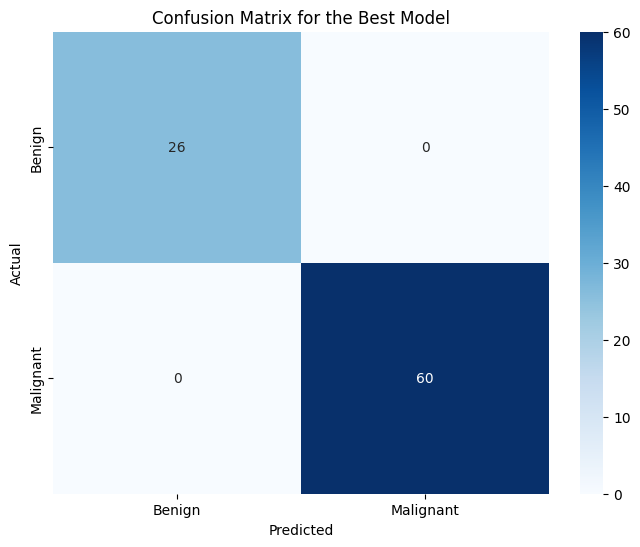

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Best Model')
plt.show()

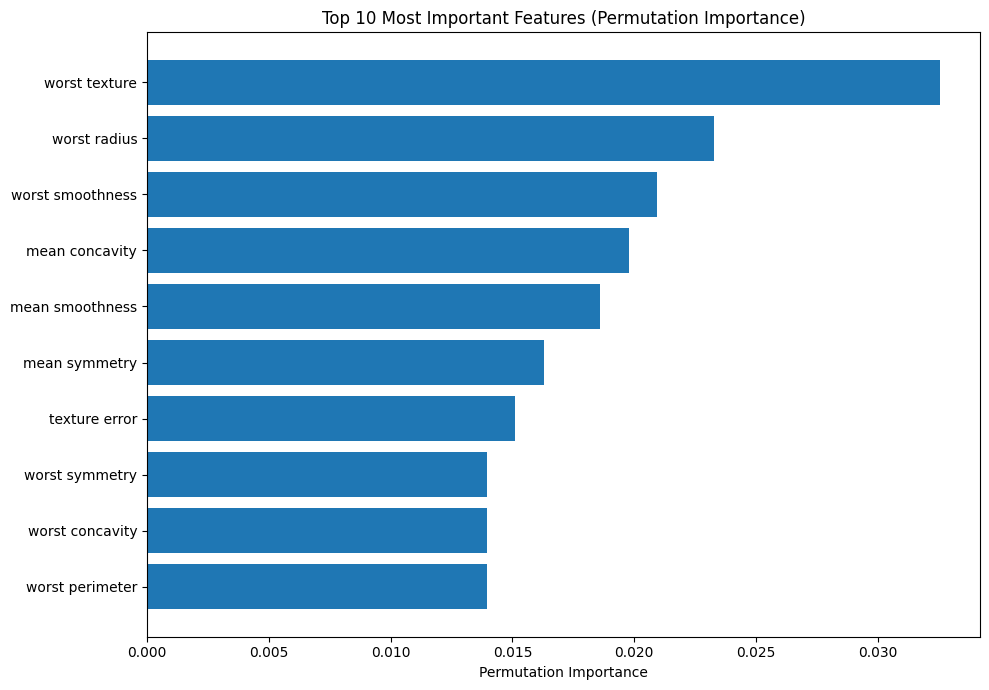

In [12]:
from sklearn.inspection import permutation_importance
import numpy as np

# Calculate permutation importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature importances and sort them
sorted_idx = result.importances_mean.argsort()
sorted_importances = result.importances_mean[sorted_idx]
sorted_feature_names = np.array(df.drop('target', axis=1).columns)[sorted_idx]

# Select the top 10 most important features
top_10_importances = sorted_importances[-10:]
top_10_feature_names = sorted_feature_names[-10:]

# Create a bar plot for the top 10 features
plt.figure(figsize=(10, 7))
plt.barh(top_10_feature_names, top_10_importances)
plt.xlabel("Permutation Importance")
plt.title("Top 10 Most Important Features (Permutation Importance)")
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The breast cancer dataset, containing 569 entries and 31 features, was successfully loaded and confirmed to have no missing values.
*   The data was preprocessed by separating features and the target variable and scaling the numerical features using `StandardScaler`.
*   The scaled data was split into training (398 samples), validation (85 samples), and test (86 samples) sets.
*   Logistic Regression, SVM, and Neural Network models were trained on the training data.
*   Initial evaluation on the validation set showed high performance for all models:
    *   Logistic Regression: Accuracy 0.9882, Recall 1.0000, AUC 0.9977
    *   SVM: Accuracy 0.9529, AUC 0.9944
    *   Neural Network: Accuracy 0.9647, AUC 0.9955
*   Hyperparameter tuning using GridSearchCV with cross-validation was performed for each model based on the F1-score.
*   The best F1-scores after tuning were approximately 0.9821 for Logistic Regression, 0.9802 for SVM, and 0.9861 for the Neural Network.
*   The Neural Network model, having the highest best F1-score after tuning, was selected as the best model.
*   Evaluation of the best Neural Network model on the test set resulted in perfect scores across all metrics: Accuracy 1.0000, Precision 1.0000, Recall 1.0000, F1-score 1.0000, and AUC 1.0000.
*   A confusion matrix for the best model on the test set showed zero false positives and zero false negatives.
*   Permutation importance analysis identified the top 10 features contributing most significantly to the model's predictions.

### Insights or Next Steps

*   The tuned Neural Network model demonstrates exceptional performance on this specific test set, achieving perfect classification. While promising, it's crucial to assess its generalization capability on unseen data or through more robust cross-validation techniques across the entire dataset.
*   Further investigation into the top 10 most important features identified by permutation importance could provide valuable clinical insights into the key factors associated with breast cancer detection in this dataset.
